# Stroke Prevention DataSet

In [1]:
# Data Cleaning - drop unecessary columns, drop duplicates, clean each column, handle null data, outliers, feature engineering 
# Data Visualization - matplotlib and seaborn 
# Data Preprocessing - resample unbalanced data, removing target features, Data encoding, Data scaling, Data splitting
    #Standard Scaler:  "centers" the data around 0 and scales it based on the standard deviation.
# Creating correlation plot 
# Building ML models

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('darkgrid')
import re 

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

## Introduction and Description
This dataset contains 5110 instances of stroke data. Important attributes include gender, age, HTN, heart disease, BG level, BMI, smoking status (Mostly known metabolic RFs). Socio-economic factors which are hypothesized to play a more minor role but still interesting for exploration include maritial status, work type, residence type. The target feature for prediction is the presence or absence of stroke. In this dataset, there are only 249 instances that are positive for stroke, implicating a very ?skewed dataset.

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# 1. Data Cleaning

The columns of data containing strings require more cleaning. The columns of data of integers and floats are generally already quite organized. 

Age, HTN, heart disease, average glucose level - no cleaning required

Smoking - Lots of NaN value counts

BMI - fill NaN values with average 

Maritial status = to numerical value

Regarding outliers, as there are 719 outliers via the IQR method, and upon inspection of the data, it is mostly contributed by patients with high BMI, which is known to be a risk factor for stroke, I'm going to leave it in for now for ML analysis

In [9]:
#removing unecessary columns
df.drop(['id'],axis=1,inplace = True)

In [10]:
#removing duplicates
df.drop_duplicates(inplace = True)
#df.info()

In [11]:
#handling smoking column:
#conclusion: large amount of unknown data, map to numerical function
print(df["smoking_status"].value_counts())
mapping = {"never smoked": 0, "smokes": 2, "formerly smoked": 1, "Unknown": np.nan}
df['smoking'] = df["smoking_status"].map(mapping)
df.smoking = df.smoking.astype('Int64')
df.drop(["smoking_status"], axis = 1, inplace = True)
df["smoking"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


0    1892
1     885
2     789
Name: smoking, dtype: Int64

In [12]:
#handling gender column

In [13]:
#handing BMI column
#conclusion: fill NaN values with average
avg = df.bmi.mean()
df.bmi.fillna(avg, inplace = True)

In [14]:
#handling maritial status column:
df.ever_married.unique()
mapping2 = {"Yes": 1, "No": 0}
df["married"] = df.ever_married.map(mapping2)
df.drop(["ever_married"], axis = 1, inplace = True)

In [15]:
#handling residence column:
df.rename(columns = {'Residence_type': "residence"}, inplace = True)

In [16]:
#handling work_type column
#changed to lower case strings
df.work_type = df.work_type.str.lower()

In [17]:
#null value handling: only the NaN values left in the smoking column
df.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
work_type               0
residence               0
avg_glucose_level       0
bmi                     0
stroke                  0
smoking              1544
married                 0
dtype: int64

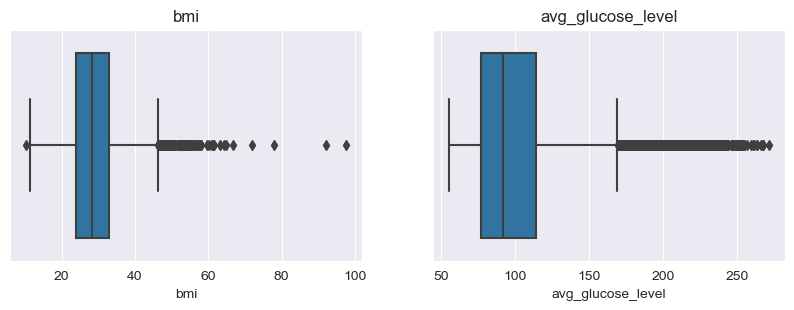

In [18]:
#outliers handling: via data visualization (alt: via IQR method)

to_plot = ['bmi', 'avg_glucose_level'] #all integer or float columns that may contain outliers

plt.figure(figsize = (10,3))
for i in range(2) :
    plt.subplot(1,2,i+1)
    sns.boxplot(x=df[to_plot[i]])
    plt.title(to_plot[i])
plt.show()

In [19]:
#outliers handling: via IQR method
#conclusion: keep outliers in for now
#conclusion: outliers are notable especially in the BMI column for several instances of BMI >80 

def outlier_function(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - IQR*1.5
    upper = Q3 + IQR*1.5

    outliers = df[(df[column] < lower) | (df[column] > upper)]
    outlierlist = outliers.index.tolist()
    return outlierlist

In [20]:
index_list = []

for column in to_plot:
    index_list.extend(outlier_function(df,column))
    
index_list = sorted(set(index_list))
len(index_list)

719

In [21]:
#finally, renaming all columns:
df.columns = ["gender", "age", "htn", "heartdz", "work", "residence", "glucose", "bmi", "stroke", "smoking", "married"]

# 2. Data Visualization

In [22]:
#plots you can make:
    #counts visualization: no. of per metabolic RF, demographic
    #atrributes relationship with stroke or with each other 
        #metabolic RFS: HTN v.s. stroke; CVD v.s. stroke, BG v.s. stroke, BMI v.s. strple, smoking status v.s. stroke
        #demographics: age v.s. stroke, gender v.s. stroke
        #other SE factors: maritial status, work, and residence type v.s. stroke

In [23]:
#Summary of cleaned data
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     5110 non-null   object 
 1   age        5110 non-null   float64
 2   htn        5110 non-null   int64  
 3   heartdz    5110 non-null   int64  
 4   work       5110 non-null   object 
 5   residence  5110 non-null   object 
 6   glucose    5110 non-null   float64
 7   bmi        5110 non-null   float64
 8   stroke     5110 non-null   int64  
 9   smoking    3566 non-null   Int64  
 10  married    5110 non-null   int64  
dtypes: Int64(1), float64(3), int64(4), object(3)
memory usage: 484.1+ KB
None


,gender,age,htn,heartdz,work,residence,glucose,bmi,stroke,smoking,married
0,Male,67.0,0,1,private,Urban,228.69,36.600000,1,1,1
1,Female,61.0,0,0,self-employed,Rural,202.21,28.893237,1,0,1
2,Male,80.0,0,1,private,Rural,105.92,32.500000,1,0,1
3,Female,49.0,0,0,private,Urban,171.23,34.400000,1,2,1
4,Female,79.0,1,0,self-employed,Rural,174.12,24.000000,1,0,1


## 2.1 Counts Visualization

From the visualization of the counts in this dataset, one can see that while the different attributes are well distributed over demographic factors such as gender and age, as well as SE factors, there is in fact very uneven data over the metabolic risk factors (very few instances with positive metabolic RFs). This will need to be fixed in data pre-processing to handle the uneven data before ML. This is especially as the metabolic RFs are the attributes which are of highest interest and likely to correlate with the occurence of stroke.

### 2.1.1 Categorical Data 

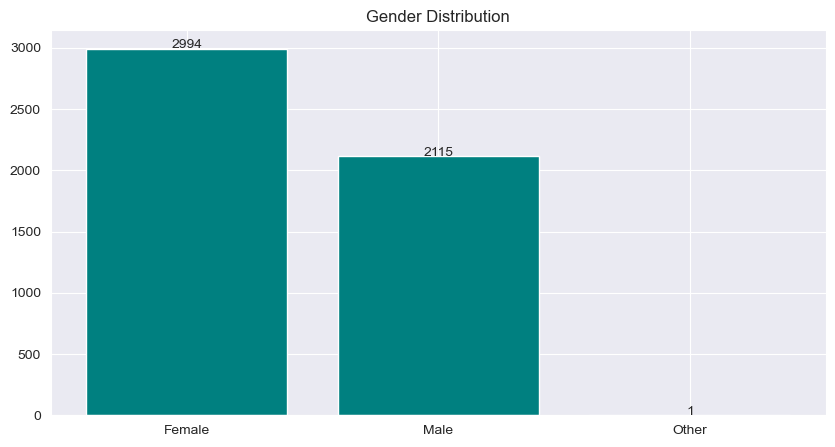

matplotlib.container.BarContainer

In [24]:
#counts plot
to_plot_dem = ["gender"]
to_plot_rf_int = ["htn", "heartdz", "smoking"]
to_plot_rf_float = ['age', 'glucose', 'bmi']
to_plot_cat = ["work", "residence", "married"]

plt.figure(figsize = (10,5))
bars = plt.bar(df["gender"].value_counts().index, df["gender"].value_counts().values, color = "teal")
plt.title("Gender Distribution")
[plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, int(bar.get_height()), ha='center') for bar in bars]
plt.show()


#notes: df[gender].value_counts() returns a Panda Series with the value of the column : count of the column, 
    #hence "value_count"
#type(df["gender"].value_counts())
#note: bars = plt.bar() , type(bars) = matplotlib.container.BarContainer
type(bars)

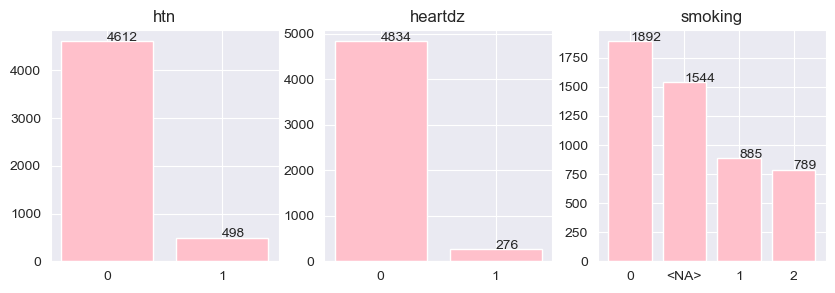

In [25]:
plt.figure(figsize = (10,3))
counter = 0
for column in to_plot_rf_int:
    counter += 1
    df[column] = df[column].astype(str)
    plt.subplot(1, 3, counter)
    plt.bar(df[column].value_counts().index, df[column].value_counts().values, color = "pink")
    plt.title(column)
    for value in df[column].value_counts().items(): #to add labels
        plt.text(value[0], value[1] + 2, str(value[1]))
plt.show()

#note: the .item() method turns the Series returned by value_counts() into a dictionary containing key-value pairs.
    #a for loop is made to iterate over this dictionary, value[0] = key, value[1] = value
#note: for the .text() function in plt, it takes three key attributes:
    #1) x position; 2) y position; 3) s = the string to display 

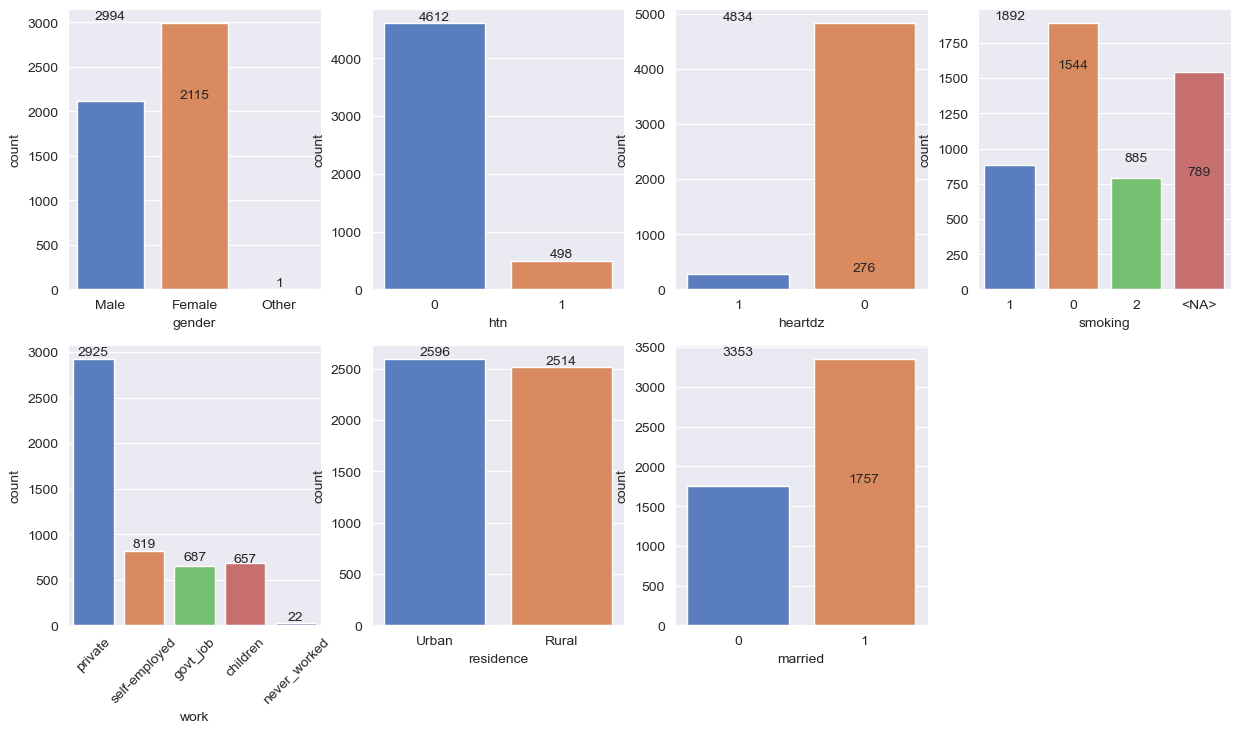

In [26]:
#Via Countplot in Seaborn:

columns_obj = ["gender", "htn", "heartdz", "smoking", "work", "residence", "married"]

plt.figure(figsize = (15, 8))
counter = 0

for column in columns_obj:
    counter += 1
    plt.subplot(2, 4, counter)
    sns.countplot(data = df, x = column, palette = "muted")
    if column == "work":
        plt.xticks(rotation = 45)
    for x, y in enumerate(df[column].value_counts()): #??
        plt.text(x, y+2, y, ha='center', va='bottom')
plt.show()

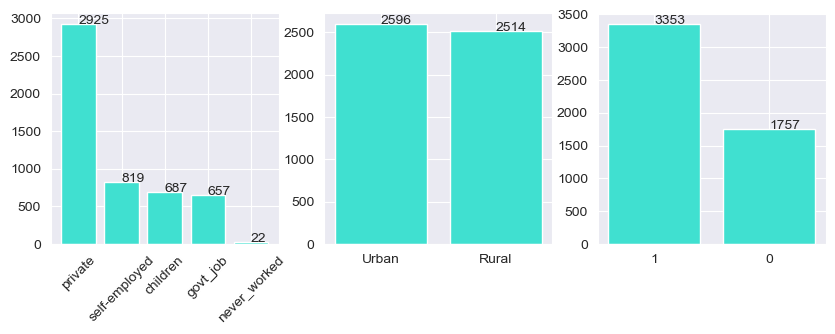

In [27]:
to_plot_cat = ["work", "residence", "married"]
counter = 0
plt.figure(figsize = (10,3))
for column in to_plot_cat:
    counter += 1
    plt.subplot(1, 3, counter)
    if column == "married": #changing married to string
        df[column] = df[column].astype('str')
    plt.bar(df[column].value_counts().index, df[column].value_counts().values, color = "turquoise")
    for x in df[column].value_counts().items():
        plt.text(x[0], x[1]+2, str(x[1]))
    if column == "work":
        plt.xticks(rotation=45)
plt.show()

### 2.1.2 Continuous Data

/var/folders/0p/j3xz875945x1yk5pyc1bvtdr0000gn/T/ipykernel_40688/2814576966.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data = df, x = "age", kde = True, palette = "bone")


<Figure size 1000x300 with 0 Axes>

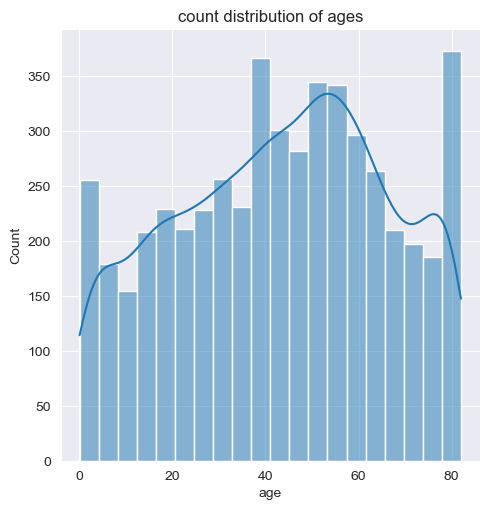

In [28]:
plt.figure(figsize = (10,3))
sns.displot(data = df, x = "age", kde = True, palette = "bone")
plt.title("count distribution of ages")
plt.show()

#displot plots the distribution a univariable variable (age), you can group them according to hue 

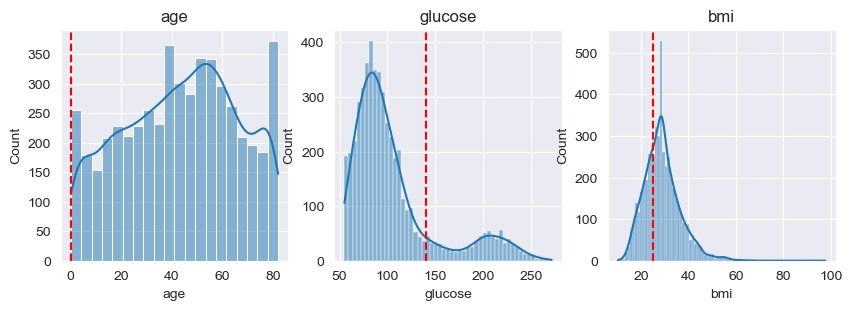

In [29]:
plt.figure(figsize = (10,3))
counter = 0
norm = 0
for column in to_plot_rf_float:
    counter += 1
    plt.subplot(1,3,counter)
    sns.histplot(data = df, x = column, kde = True)
    if column == 'glucose': #adding normal line
        norm = 140
    elif column == 'bmi':
        norm = 24.9
    plt.axvline(x = norm, color='red', linestyle='--', label='Threshold')
    plt.title(column)
plt.show()

## 2.2 Relationship with Stroke Visualization

In [30]:
#data refresher again
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     5110 non-null   object 
 1   age        5110 non-null   float64
 2   htn        5110 non-null   object 
 3   heartdz    5110 non-null   object 
 4   work       5110 non-null   object 
 5   residence  5110 non-null   object 
 6   glucose    5110 non-null   float64
 7   bmi        5110 non-null   float64
 8   stroke     5110 non-null   int64  
 9   smoking    5110 non-null   object 
 10  married    5110 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 608.1+ KB
None


,gender,age,htn,heartdz,work,residence,glucose,bmi,stroke,smoking,married
1649,Female,32.0,0,0,private,Urban,68.19,21.1,0,0,0
568,Female,81.0,0,0,self-employed,Urban,71.91,19.2,0,<NA>,0
755,Female,64.0,0,0,private,Rural,250.20,27.4,0,<NA>,1
4145,Male,57.0,0,0,private,Rural,92.59,24.2,0,<NA>,1
591,Male,48.0,0,0,private,Urban,85.54,32.2,0,2,1


### 2.2.1 Categorical Variables against stroke
When we look at the percentage of stroke in each category, we can see that there is a higher incidence of stroke in Male, Smokers& Ex-smokers. 

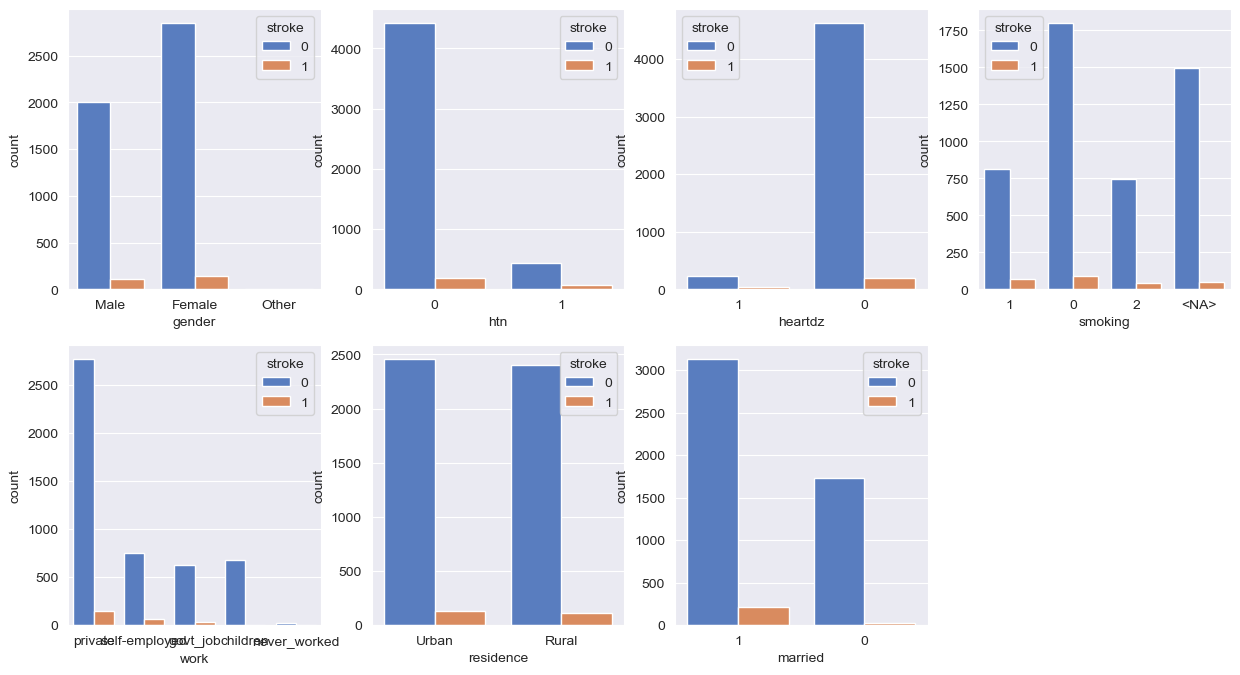

In [31]:
#subplot of all categorical attributes v.s. stroke
columns_obj = ["gender", "htn", "heartdz", "smoking", "work", "residence", "married"]

plt.figure(figsize = (15, 8))
counter = 0

for column in columns_obj:
    counter += 1
    plt.subplot(2, 4, counter)
    sns.countplot(x = df[columns_obj[counter-1]], hue = df['stroke'], palette = "muted")
    
plt.show()

<Axes: xlabel='smoker', ylabel='%stroke'>

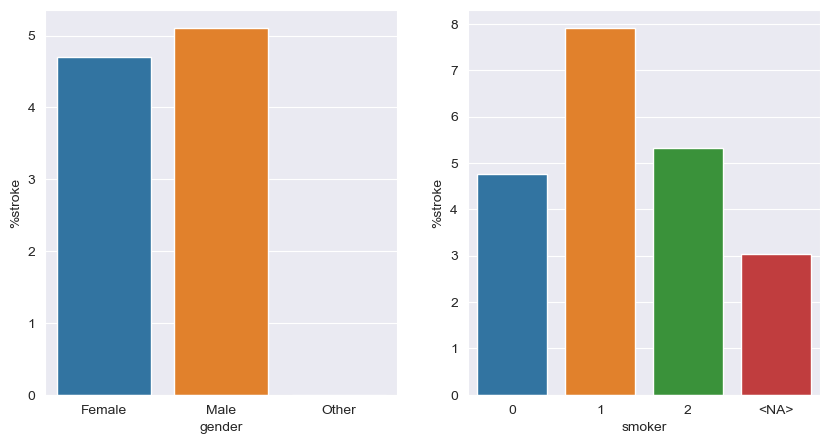

In [32]:
#subplot of all categorical attributes in % vs stroke
#plot%stroke in male v.s. female; smoking status, etc
#need to engineer new attributes

gender_pc = df.groupby("gender")["stroke"].apply(lambda x: (x == 1).sum() / len(x) * 100).reset_index()
gender_pc.columns = ["gender", "%stroke"]
smoker_pc = df.groupby("smoking")["stroke"].apply(lambda x: (x == 1).sum() / len(x) * 100).reset_index()
smoker_pc.columns = ["smoker", "%stroke"]

plt.figure(figsize = (10,5))
plt.subplot(121)
sns.barplot(data = gender_pc, x = "gender", y = "%stroke")
plt.subplot(122)
sns.barplot(data = smoker_pc, x = "smoker", y = "%stroke")

#note that df.groupby.. that line is how you engineer the % in categorical variables!

### 2.2.2 Numerical variables against stroke
Plotting numerical variables against stroke, one can see a clear correlation between the incidence of stroke and higher age, BMI, and glucose levels.

<Figure size 5000x500 with 0 Axes>

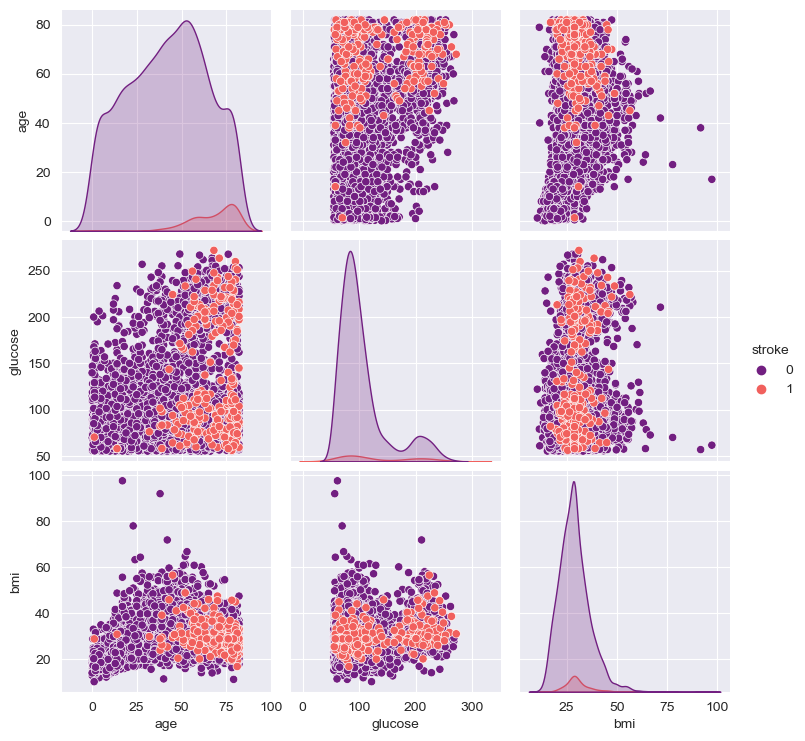

In [33]:
#numerical attributes v.s. stroke: pairplot, hue = stroke; to see any correlation
df_s = df.sort_values(by="stroke") #this is to sort the table so the orange stroke = 1 dots appear on top of the blue ones

plt.figure(figsize = (50,5))
sns.pairplot(data = df_s, hue = "stroke", palette = "magma")
plt.show()

In [34]:
#plot numerical attributes v.s. stroke (made redundant by pariplot)
#plt.figure(figsize = (10,5))

#plt.subplot(1,2,1)
#sns.scatterplot(x = df_s["glucose"], y = df_s["bmi"], hue = df_s["stroke"], palette = "seismic")
#plt.title("RG vs BMI, stroke distribution")
#plt.subplot(1,2,2)
#sns.scatterplot(x = df_s["age"], y = df_s["bmi"], hue = df_s["stroke"], palette = "seismic")
#plt.title("Age vs BMI, stroke distribution")
#plt.show()

### 2.2.3 Plotting metabolic risk factors against each other

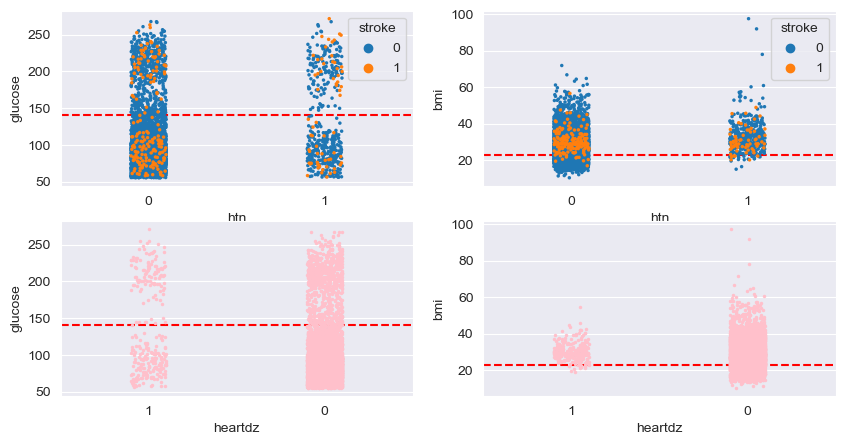

In [35]:
#plot correlation between metabolic risk factors e.g. glucose level & BMI v.s. HTN, heart disease

#Glucose level & BMI v.s. HTN on a catplot
plt.figure(figsize = (10,5))
plt.subplot(221)
sns.stripplot(data = df_s, x = "htn", y = "glucose", marker = ".", hue = "stroke")
plt.axhline(y=140, color='red', linestyle='--', label='Threshold')

plt.subplot(222)
sns.stripplot(data = df_s, x = "htn", y = "bmi", marker = ".", hue = "stroke")
plt.axhline(y=23, color='red', linestyle='--', label='Threshold')

plt.subplot(223)
sns.stripplot(data = df, x = "heartdz", y = "glucose", marker = ".", color = "pink")
plt.axhline(y=140, color='red', linestyle='--', label='Threshold')

plt.subplot(224)
sns.stripplot(data = df, x = "heartdz", y = "bmi", marker = ".", color = "pink")
plt.axhline(y=23, color='red', linestyle='--', label='Threshold')

### 2.2.4 Challenge for self: plot metabolic RFs over age 

<Axes: xlabel='age'>

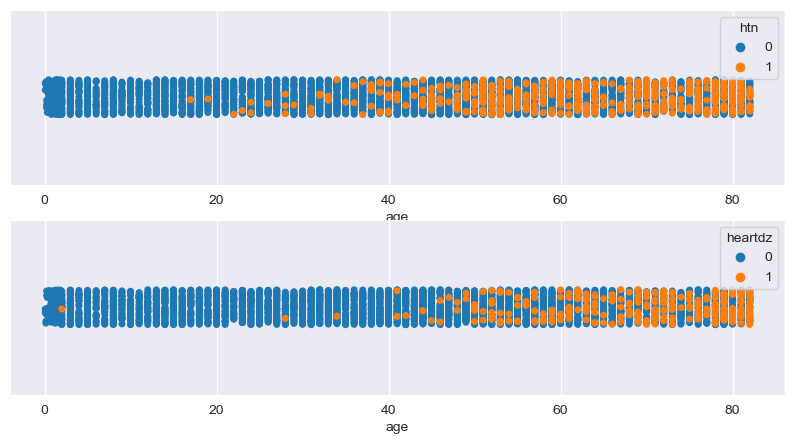

In [36]:
#plot HTN over age
df_h = df.sort_values(by="htn")
df_c = df.sort_values(by="heartdz")

plt.figure(figsize = (10,5))
plt.subplot(211)
sns.stripplot(data = df_h, x = "age", hue = "htn")
plt.subplot(212)
sns.stripplot(data = df_c, x = "age", hue = "heartdz")

### 2.2.5 Challenge for self: Pie chart using plt

            work    stroke
0       children  0.291121
1       govt_job  5.022831
2   never_worked  0.000000
3        private  5.094017
4  self-employed  7.936508


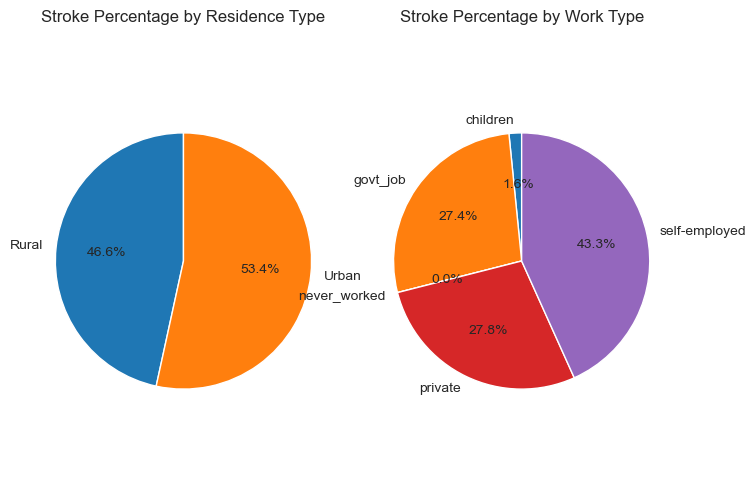

In [37]:
#plot pie chart of % of attributes in stroke population for residence, work, and marries

residence_pc = df.groupby("residence")["stroke"].apply(lambda x: (x == 1).sum() / len(x) * 100).reset_index()
#residence_pc.head()plt.pie()
labels = residence_pc['residence'].tolist() #sets labels of pie chart
sizes = residence_pc['stroke'].tolist() #sets percentage of pie chart

work_pc = df.groupby('work')['stroke'].apply(lambda x: (x==1).sum() / len(x) * 100).reset_index()
labelsw = work_pc['work'].tolist()
sizesw = work_pc['stroke'].tolist()
print(work_pc.head())
plt.figure(figsize=(8,6))
plt.subplot(121)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) #%1.1f%% sets 1 decimal place in label
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title("Stroke Percentage by Residence Type")

plt.subplot(122)
plt.pie(sizesw, labels=labelsw, autopct='%1.1f%%', startangle=90) #%1.1f%% sets 1 decimal place in label
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.title("Stroke Percentage by Work Type")

plt.show()

### Correlation Plots

In [38]:
df[to_plot_rf_float].head()

,age,glucose,bmi
0,67.0,228.69,36.600000
1,61.0,202.21,28.893237
2,80.0,105.92,32.500000
3,49.0,171.23,34.400000
4,79.0,174.12,24.000000


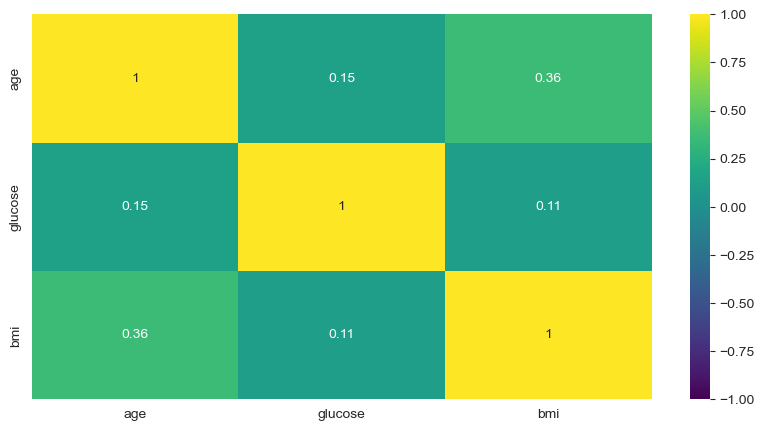

In [39]:
#Spearman correlation for numerical variables

corr_spearman = df[to_plot_rf_float].corr(method = 'spearman')
fig = plt.figure(figsize = (10,5))
sns.heatmap(corr_spearman, annot = True, cmap = "viridis", vmin = -1, vmax = +1)
plt.show()

# 3. Data Pre-processing

In [40]:
#Import libraries for ML

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn .ensemble import RandomForestClassifier 
from sklearn .ensemble import VotingClassifier , BaggingClassifier , StackingClassifier 


## 3.1 Resample Unbalanced Data
Upsampling or Downsampling via "Resample"

In [41]:
df_stroke0 = df[df.iloc[:, 8] == 0]
df_stroke1 = df[df.iloc[:, 8] == 1]

df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [42]:
df_stroke1 = resample(df_stroke1,replace=True , n_samples=df_stroke0.shape[0] , random_state=123 )

#resamples df_1 to the number pf samples in df0

In [43]:
df = np.concatenate((df_stroke0, df_stroke1))
df = pd.DataFrame(df)
df.columns = ['gender', 'age', 'hypertension', 'heartdz', 'work', 'residence', 'glucose', 'bmi', 'stroke', 'smoke', 'married']
#df now contains the upsampled data

df.stroke.value_counts()
#data upsampled successfully

0    4861
1    4861
Name: stroke, dtype: int64

In [44]:
df.head()

,gender,age,hypertension,heartdz,work,residence,glucose,bmi,stroke,smoke,married
0,Male,3.0,0,0,children,Rural,95.12,18.0,0,<NA>,0
1,Male,58.0,1,0,private,Urban,87.96,39.2,0,0,1
2,Female,8.0,0,0,private,Urban,110.89,17.6,0,<NA>,0
3,Female,70.0,0,0,private,Rural,69.04,35.9,0,1,1
4,Male,14.0,0,0,never_worked,Rural,161.28,19.1,0,<NA>,0


## 3.2 Encoding Data
Changing all categorical variables into binary

In [45]:
dff = pd.get_dummies(data=df, columns = ['gender', 'hypertension', 'heartdz', 'work', 'residence', 'smoke', 'married'], drop_first = True)
    
#get_dummies is a function in the pandas library used to convert categorical variable(s) into dummy/indicator variables. Essentially, for each unique value in a categorical column, a new binary (0 or 1) column is created, indicating the presence of each unique value.


In [46]:
dff.head()

,age,glucose,bmi,stroke,gender_Male,gender_Other,hypertension_1,heartdz_1,work_govt_job,work_never_worked,work_private,work_self-employed,residence_Urban,smoke_1,smoke_2,smoke_<NA>,married_1
0,3.0,95.12,18.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,58.0,87.96,39.2,0,1,0,1,0,0,0,1,0,1,0,0,0,1
2,8.0,110.89,17.6,0,0,0,0,0,0,0,1,0,1,0,0,1,0
3,70.0,69.04,35.9,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,14.0,161.28,19.1,0,1,0,0,0,0,1,0,0,0,0,0,1,0


## 3.3 Feature - Target Splitting

In [47]:
x = dff.drop("stroke", axis = 1)
y = pd.to_numeric(dff['stroke'])

#x now contains only the features for ML
#y now contains only the stroke "outcome" features
#pd.to_numeric is a pandas function that's used to convert a series or a single value to a numeric data type (like float or integer). It's especially useful when you have a dataset where numbers might be stored as strings or mixed with non-numeric values, and you want to convert them into a format suitable for mathematical operations.

## 3.4 Data Scaling
StandardScaler is a preprocessing technique provided by the scikit-learn library in Python. It is used to standardize the features of a dataset, i.e., to make them have a mean of 0 and a standard deviation of 1. This is also commonly referred to as z-score normalization.

In [48]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

## 3.5 Training set v.s. Test set splitting

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20)

## 3.6 Correlation plot

In [50]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 9722 non-null   object
 1   glucose             9722 non-null   object
 2   bmi                 9722 non-null   object
 3   stroke              9722 non-null   object
 4   gender_Male         9722 non-null   uint8 
 5   gender_Other        9722 non-null   uint8 
 6   hypertension_1      9722 non-null   uint8 
 7   heartdz_1           9722 non-null   uint8 
 8   work_govt_job       9722 non-null   uint8 
 9   work_never_worked   9722 non-null   uint8 
 10  work_private        9722 non-null   uint8 
 11  work_self-employed  9722 non-null   uint8 
 12  residence_Urban     9722 non-null   uint8 
 13  smoke_1             9722 non-null   uint8 
 14  smoke_2             9722 non-null   uint8 
 15  smoke_<NA>          9722 non-null   uint8 
 16  married_1           9722

# Building ML Models

## Decision Tree

In [51]:
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred = tree.predict(x_test)
accuracy_score(y_test, y_pred)

## KNN 

In [60]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.9475578406169666

## Naive Bayes

In [56]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [57]:
y_pred = nb.predict(x_test)
accuracy_score(y_test, y_pred)

0.6025706940874036

## Support Vector Classifier

In [62]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [63]:
y_pred = svm.predict(x_test)
accuracy_score(y_test, y_pred)

0.8293059125964011

## Logistic Regression

In [64]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [65]:
y_pred = lr.predict(x_test)
accuracy_score(y_test, y_pred)

0.774293059125964

# Ensemble Learning

In [66]:
#random forest
#voting technique
#bagging technique
#stacking technique


Example Code
https://www.kaggle.com/code/abdulrahmankhaled1/stroke-prediction-ensemble-learning-for-beginners/notebook
https://www.kaggle.com/code/docxian/stroke-prediction#Build-Model